
**CONTESTO:** *Fatal Police Shooting in the US*

L’omicidio del 2014 di Michael Brown a Ferguson, Missouri, ha dato origine a una protesta culminata nel movimento Black Lives Matter e al crescente interesse dell’opinione pubblica sull’affidabilità e il razzismo delle forze di polizia negli Stati Uniti.


**OBIETTIVO:** Analizzare i dati inerenti ai casi di omicidio (da arma da fuoco) da parte della polizia negli Stati Uniti con lo scopo di evidenziare possibili bias razziali da parte della polizia.




STRUTTURA DEL PROGETTO: 
1. Caricamento dei dati: Iniziamo caricando i dati relativi ai casi di omicidio da arma da fuoco da parte della polizia negli Stati Uniti unendo i data Set a disposizione.
2. Analisi raggruppata per etnia: Suddivideremo i dati in gruppi basati sulla etnia, età , città, reddito e valuteremo le differenze nella distribuzione dei casi di omicidio da parte della polizia.
3. Analisi dei rapporti: Calcoleremo i rapporti delle uccisioni in base all'etnia rispetto alla popolazione per identificare eventuali bias razziali, utilizzando una città campione.
4. Conclusioni: Concluderemo presentando i risultati dell'analisi e fornendo una sintesi delle evidenze riguardo a possibili bias razziali nella polizia americana.

1. CARICAMENTO DATI E INFO SUL DATASET
- unisco i due dataset sulle sparatorie

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
police_shootings_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\fatal-police-shootings-data.csv" 
police_shootings_df = pd.read_csv(police_shootings_path, encoding='ISO-8859-1')

police_killing_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PoliceKillingsUS.csv"
police_killing_df = pd.read_csv(police_killing_path, encoding='ISO-8859-1')


shootings_df = pd.merge(police_shootings_df, police_killing_df, how='outer')

#converto age da float a intero
shootings_df['age'] = shootings_df['age'].fillna(0).astype(int)  

map_races = {'W':'White, non-Hispanic', 'B':'Black, non-Hispanic', 'H':'Hispanic', 'A':'Asian', 'N':'Native American', 'O':'Other'}
for k, v in map_races.items():
    shootings_df['race'] = shootings_df['race'].replace(k, v)

display(shootings_df.head(5))






,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,"White, non-Hispanic",Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,"White, non-Hispanic",San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


vediamo le uccisioni totali

In [2]:
# Calcolo del numero totale di sparatorie
total_shootings = shootings_df.shape[0]  

print("Numero totale di sparatorie:", total_shootings)

Numero totale di sparatorie: 10537


2. ANALISI RAGGRUPPATA

2.1 vediamo il trend delle sparatorie negli anni a disposizione forniti nel data set

In [3]:
# Caricamento dei dataset police_shootings_df e police_killing_df
police_shootings_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\fatal-police-shootings-data.csv"
police_shootings_df = pd.read_csv(police_shootings_path, encoding='ISO-8859-1')

police_killing_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PoliceKillingsUS.csv"
police_killing_df = pd.read_csv(police_killing_path, encoding='ISO-8859-1')

# Unione dei dataframe
shootings_df = pd.merge(police_shootings_df, police_killing_df, how='outer')

# Converto la colonna 'date' in formato data riconoscendo automaticamente i formati diversi
shootings_df['date'] = pd.to_datetime(shootings_df['date'], errors='coerce')

# Filtro per gli anni dal 2015 al 2023
filtered_shootings_df = shootings_df[shootings_df['date'].dt.year.between(2015, 2023)]

# Calcolo il numero di sparatorie per ogni anno
shooting_counts_per_year = filtered_shootings_df['date'].dt.year.value_counts().sort_index()

# Stampo il numero di sparatorie per ogni anno
print(shooting_counts_per_year)





date
2015     994
2016     958
2017     981
2018     992
2019     999
2020    1019
2021    1053
2022    1006
Name: count, dtype: int64


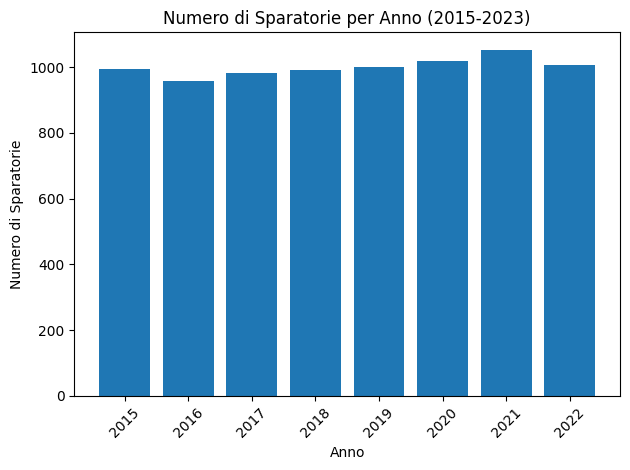

In [4]:
# Creazione del grafico a barre
plt.bar(shooting_counts_per_year.index, shooting_counts_per_year.values)
plt.xlabel('Anno')
plt.ylabel('Numero di Sparatorie')
plt.title('Numero di Sparatorie per Anno (2015-2023)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


2.2 vediamo quanti di questi shooting vengono usate le body_cam

In [5]:
# Calcolo del numero di sparatorie con body cam attiva e body cam non attiva
body_cam_counts = shootings_df['body_camera'].value_counts()

# Stampo i risultati
print("Sparatorie con Body Cam Attiva:", body_cam_counts[True])
print("Sparatorie con Body Cam Non Attiva:", body_cam_counts[False])

Sparatorie con Body Cam Attiva: 1408
Sparatorie con Body Cam Non Attiva: 9129


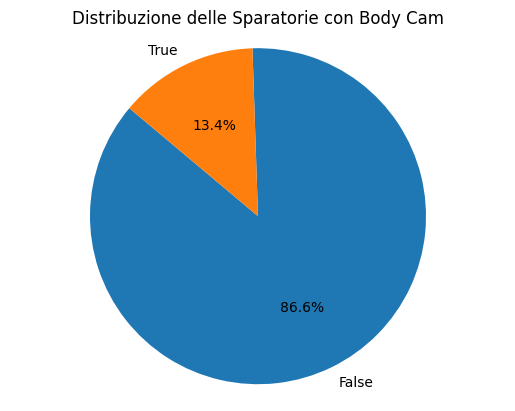

In [6]:
# Creazione del grafico a torta
plt.pie(body_cam_counts, labels=body_cam_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Distribuzione delle Sparatorie con Body Cam')
plt.show()

2.3 quante di queste sparatorie sono coinvolte persone con malattie mentali?

In [7]:
# Calcolo il numero di uccisioni per malati mentali e non malati mentali
total_shootings = len(shootings_df)
shootings_with_mental_illness = len(shootings_df[shootings_df['signs_of_mental_illness'] == True])
shootings_without_mental_illness = total_shootings - shootings_with_mental_illness

# Stampo i risultati
print("Uccisioni per malattie mentali:", shootings_with_mental_illness)
print("Uccisioni senza malattie mentali:", shootings_without_mental_illness)

Uccisioni per malattie mentali: 2304
Uccisioni senza malattie mentali: 8233


2.4 ETNIA

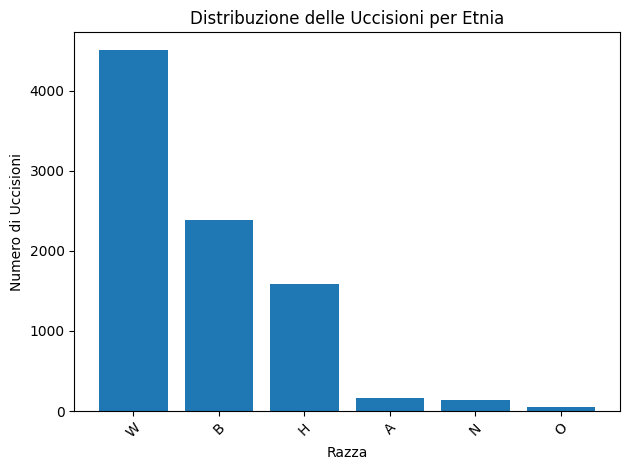

In [8]:
# Calcolo la distribuzione delle uccisioni per razza
racial_killing_counts = shootings_df['race'].value_counts()

# Creazione del grafico a barre
plt.bar(racial_killing_counts.index, racial_killing_counts.values)
plt.xlabel('Razza')
plt.ylabel('Numero di Uccisioni')
plt.title('Distribuzione delle Uccisioni per Etnia')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


2.5 ETA'

In [9]:
# Load and merge the datasets 
police_shootings_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\fatal-police-shootings-data.csv" 
police_shootings_df = pd.read_csv(police_shootings_path, encoding='ISO-8859-1')

police_killing_path = r"C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PoliceKillingsUS.csv"
police_killing_df = pd.read_csv(police_killing_path, encoding='ISO-8859-1')

police_killing_df.rename(columns={'id': 'person_id'}, inplace=True)
shootings_df = pd.merge(police_shootings_df, police_killing_df, how='outer')


shootings_df['age'] = shootings_df['age'].fillna(0).astype(int)

map_races = {'W':'White, non-Hispanic', 'B':'Black, non-Hispanic', 'H':'Hispanic', 'A':'Asian', 'N':'Native American', 'O':'Other'}
for k, v in map_races.items():
    shootings_df['race'] = shootings_df['race'].replace(k, v)

# Create age ranges
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Add a new column for age ranges
shootings_df['age_range'] = pd.cut(shootings_df['age'], bins=age_ranges, labels=age_labels, right=False)

# Group by age range and calculate statistics
age_stats = shootings_df.groupby('age_range').agg(
    total_cases=pd.NamedAgg(column='age', aggfunc='count'),
    average_age=pd.NamedAgg(column='age', aggfunc='mean'),
    median_age=pd.NamedAgg(column='age', aggfunc='median')
).reset_index()

# Display the age statistics
display(age_stats)


,age_range,total_cases,average_age,median_age
0,0-10,585,0.047863,0.0
1,11-20,517,17.649903,18.0
2,21-30,2713,25.049023,25.0
3,31-40,3079,34.256252,34.0
4,41-50,1844,44.207701,44.0
5,51-60,1183,54.035503,54.0
6,61-70,466,63.512876,63.0
7,71-80,114,73.333333,73.0
8,80+,36,83.944444,83.0


Visualizzo i risultati su un grafico a barre

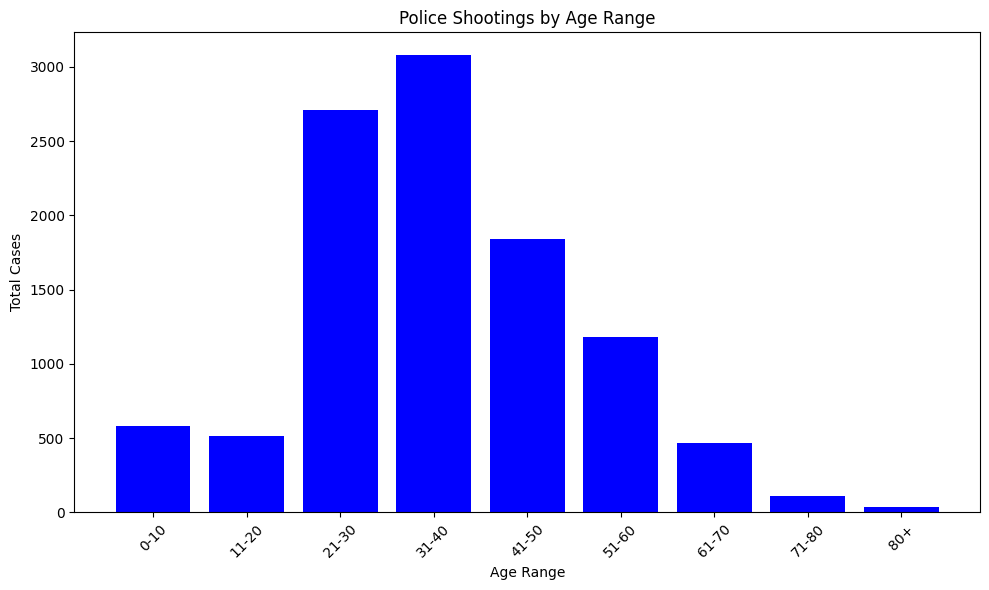

In [11]:
# Creo un grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(age_stats['age_range'], age_stats['total_cases'], color='blue')
plt.xlabel('Age Range')
plt.ylabel('Total Cases')
plt.title('Police Shootings by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


2.6 Approfondimento dell'etnia per ogni fascia di età

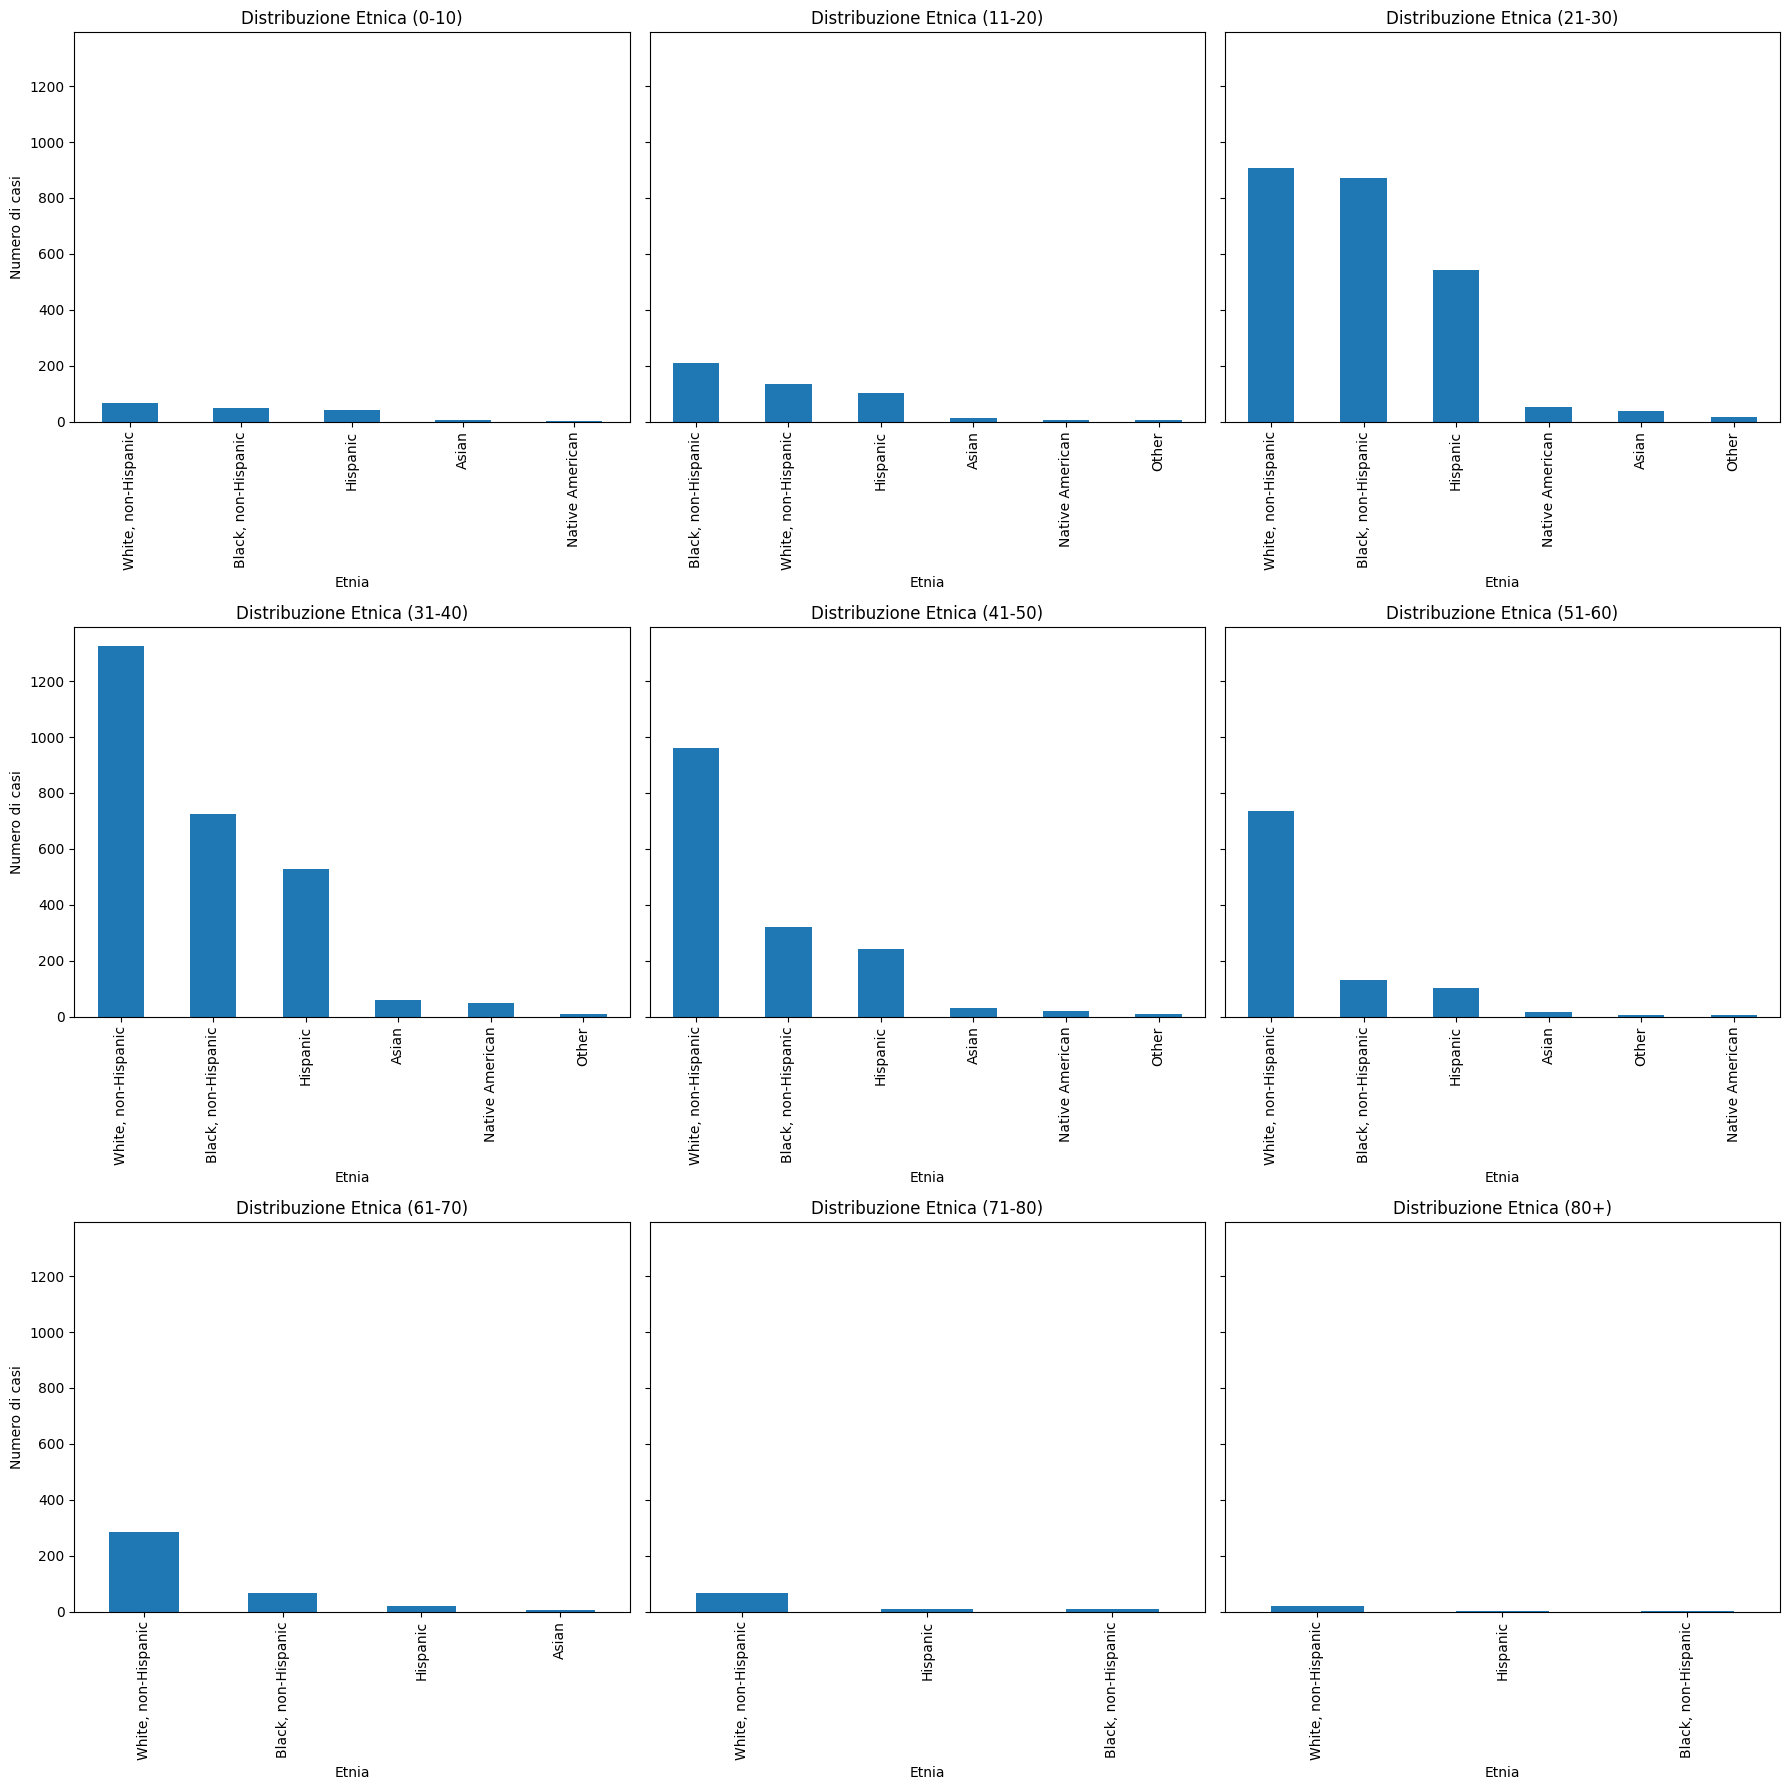

In [12]:
# Creazione delle fasce d'età
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Aggiungo una nuova colonna per le fasce d'età
shootings_df['age_range'] = pd.cut(shootings_df['age'], bins=age_ranges, labels=age_labels, right=False)

# Creazione di una figura con sottoplot disposti in una griglia 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18), sharey=True)

# Appiattimento dell'array degli assi per facilitare l'iterazione
axes = axes.flatten()

# Iterazione attraverso le fasce d'età e creazione dei grafici
for i, age_label in enumerate(age_labels):
    age_range_df = shootings_df[shootings_df['age_range'] == age_label]
    racial_distribution = age_range_df['race'].value_counts()
    
    # Creazione del grafico della distribuzione per etnia di ciascuna fascia d'età
    racial_distribution.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribuzione Etnica ({age_label})')
    axes[i].set_xlabel('Etnia')
    axes[i].set_ylabel('Numero di casi')
    
    # Impostazione dei nomi sull'asse x in verticale
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    
# Regolazione dello spaziamento tra i sottoplot
plt.tight_layout()

# Mostra i grafici
plt.show()






2.7 Gender Distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


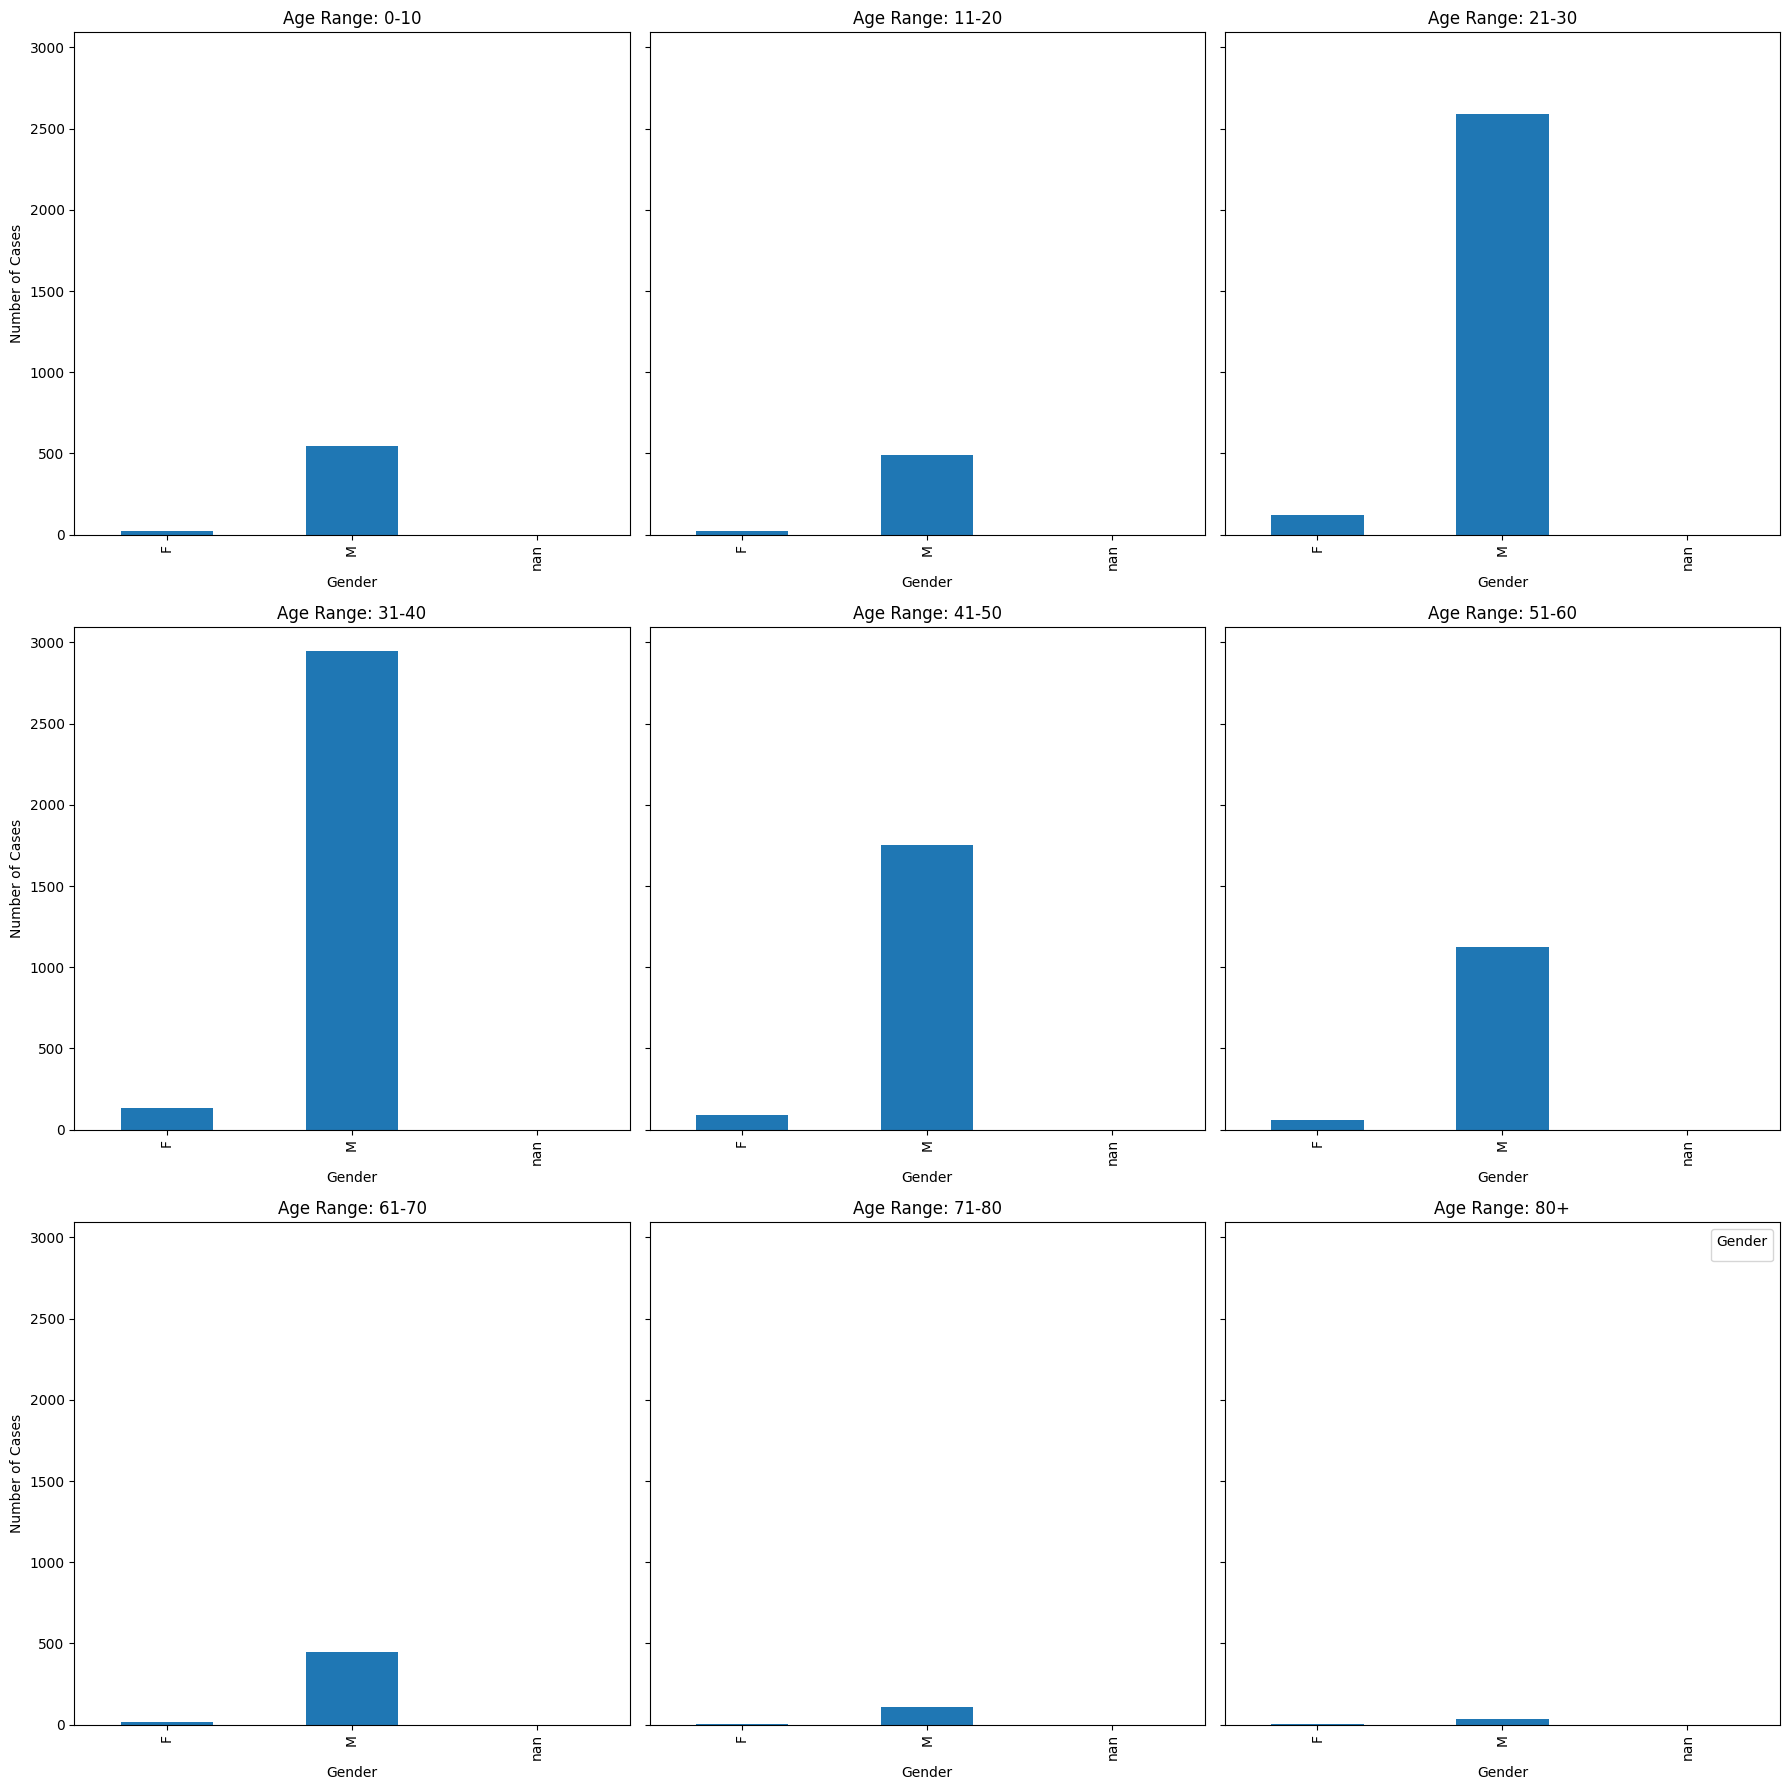

In [14]:
unique_genders = shootings_df['gender'].unique()

# creo grafici in 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18), sharey=True)

# appiattisco gli assi per una ficle iterazione
axes = axes.flatten()


for i, age_label in enumerate(age_labels):
    age_range_df = shootings_df[shootings_df['age_range'] == age_label]
    gender_distribution = age_range_df['gender'].value_counts()
    
    # Crea una serie con 0 per i valori di genere mancanti
    missing_genders = [gender for gender in unique_genders if gender not in gender_distribution.index]
    missing_distribution = pd.Series(0, index=missing_genders)
    
    # Combino la distribuzione di genere e la distribuzione mancante
    combined_distribution = gender_distribution.add(missing_distribution, fill_value=0)
    
    # Plotto la distribuzione di genere per ciascuna fascia di età
    combined_distribution.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Age Range: {age_label}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Number of Cases')

# legenda
plt.legend(title='Gender')

# spazio tra i subplots
plt.tight_layout()


plt.show()






3. CALCOLO PROPORZIONI UCCISIONI

carico dati della popolazione e dell'etnia per ogni città

In [15]:
# Caricamento del database contenente i dati sulla popolazione per città
population_data_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PopulationByCity - PopulationByCity.csv'
population_data = pd.read_csv(population_data_path)

# Caricamento del database contenente i dati sulla distribuzione della razza per città
race_data_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\ShareRaceByCity.csv'
race_data = pd.read_csv(race_data_path)

# Rename Geographic area to state, City to city 
race_data.rename(columns={'Geographic area':'state', 'City':'city'}, inplace=True)

# Convert share_white, share_black, share_native_american, share_asian, share_hispanic from string to float  and replace invalid value '(X)' with NaN
columns_to_convert_to_float = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_data[columns_to_convert_to_float] = race_data[columns_to_convert_to_float].replace('(X)', 'NaN')
race_data[columns_to_convert_to_float] = race_data[columns_to_convert_to_float].astype(float)



3.1 Quali sono le città piu popolate?

In [16]:
# Carico i dati della popolazione
population_data_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PopulationByCity - PopulationByCity.csv'
population_data = pd.read_csv(population_data_path)

# Sort cities by population in descending order and select the top 5
most_populous_cities = population_data.sort_values(by='population', ascending=False).head(5)

print("Most Populous Cities:")
print(most_populous_cities)



Most Populous Cities:
             City state  population        lat         lng
1852     New York    NY  19354922.0  155.43.00  -227.09.00
375   Los Angeles    CA  12815475.0   52.59.00  -185.48.00
993       Chicago    IL   8675982.0  180.33.00  -201.22.00
727         Miami    FL   6381966.0  155.39.00  -115.02.00
2379       Dallas    TX   5733259.0  164.16.00  -223.42.00


3.2    le 10 citta con piu sparatorie

In [17]:
# Carico il dataset shootings_df 
shootings_df = pd.merge(police_shootings_df, police_killing_df, how='outer')

# Conto il numero di sparatorie per ogni città
city_shooting_counts = shootings_df['city'].value_counts()

# Visualizzo le prime 10 città con il maggior numero di sparatorie
top_cities = city_shooting_counts.head(10)
print(top_cities)


city
Los Angeles    169
Phoenix        136
Houston        118
Las Vegas       89
San Antonio     88
Chicago         75
Albuquerque     73
Columbus        67
Austin          59
Denver          58
Name: count, dtype: int64


 3.3 Prendiamo come esempio campione Los Angeles (CA) poiche risulta essere tra le città più popolose e dove avvengono piu sparatorie



In [20]:
# Converto i valori '(X)' in NaN e convero le colonne in float
columns_to_convert_to_float = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_data[columns_to_convert_to_float] = race_data[columns_to_convert_to_float].replace('(X)', np.nan).astype(float)

# Filtro solo i dati relativi a Los Angeles
los_angeles_data = race_data[race_data['city'] == 'Los Angeles city']

# Stampo la distribuzione razziale per Los Angeles
los_angeles_data




,state,city,share_white,share_black,share_native_american,share_asian,share_hispanic
2714,CA,Los Angeles city,49.8,9.6,0.7,11.3,48.5


vediamo quali sono le principali etnie vittime di conflitti a fuoco da parte della polizia 

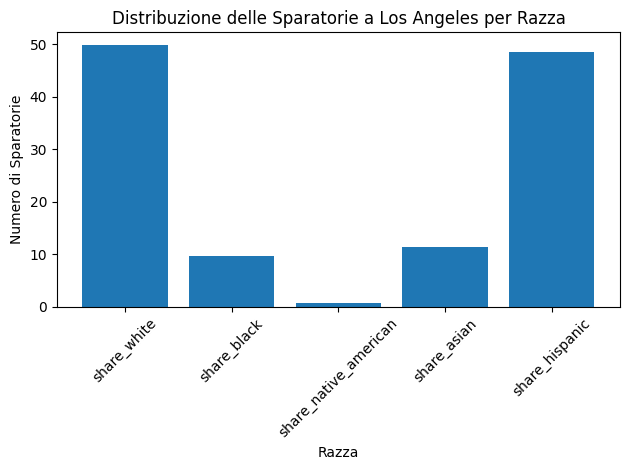

In [21]:
# Carico il dataset race_data 
race_data_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\ShareRaceByCity.csv'
race_data = pd.read_csv(race_data_path)

# Rinomino le colonne
race_data.rename(columns={'Geographic area':'state', 'City':'city'}, inplace=True)

# Converto i valori '(X)' in NaN e converi le colonne in float
columns_to_convert_to_float = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_data[columns_to_convert_to_float] = race_data[columns_to_convert_to_float].replace('(X)', np.nan).astype(float)

# Filtro solo i dati relativi a Los Angeles
los_angeles_data = race_data[race_data['city'] == 'Los Angeles city']

# Seleziono le colonne delle diverse etnie
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_data_los_angeles = los_angeles_data[race_columns]

# Sommo il numero di sparatorie per ogni etnia
shooting_counts = race_data_los_angeles.sum()

# Creo un grafico a barre
plt.bar(race_columns, shooting_counts)
plt.xlabel('Razza')
plt.ylabel('Numero di Sparatorie')
plt.title('Distribuzione delle Sparatorie a Los Angeles per Razza')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra il grafico
plt.show()


Soglia di povertà tra gli Stati

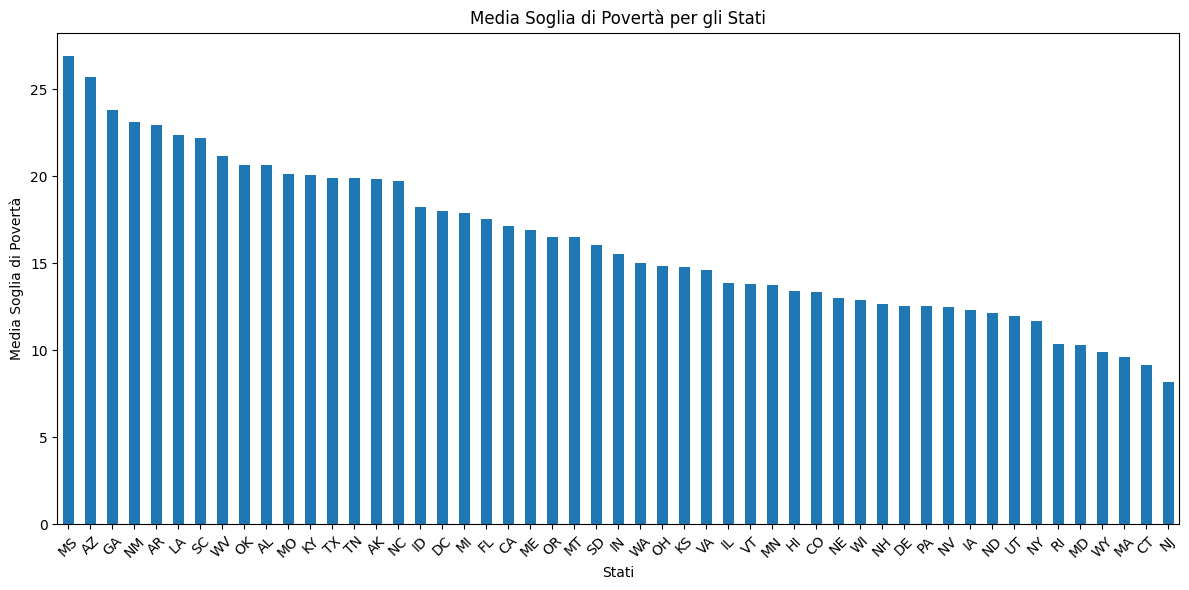

In [22]:
# Carico il dataset poverty_data
poverty_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\PercentagePeopleBelowPovertyLevel.csv'
poverty_data = pd.read_csv(poverty_path, encoding='ISO-8859-1')

# Converto i valori nella colonna 'poverty_rate' in float
poverty_data['poverty_rate'] = pd.to_numeric(poverty_data['poverty_rate'], errors='coerce')

# Raggruppo i dati per stato e calcola la media della soglia di povertà
average_poverty_by_state = poverty_data.groupby('Geographic Area')['poverty_rate'].mean()

# Ordino gli stati in base alla media della soglia di povertà in ordine decrescente
sorted_states = average_poverty_by_state.sort_values(ascending=False)

# Creo un grafico a barre della soglia di povertà per gli stati
plt.figure(figsize=(12, 6))
sorted_states.plot(kind='bar')
plt.xlabel('Stati')
plt.ylabel('Media Soglia di Povertà')
plt.title('Media Soglia di Povertà per gli Stati')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostro il grafico
plt.show()




MEDIAN HOUSE INCOME

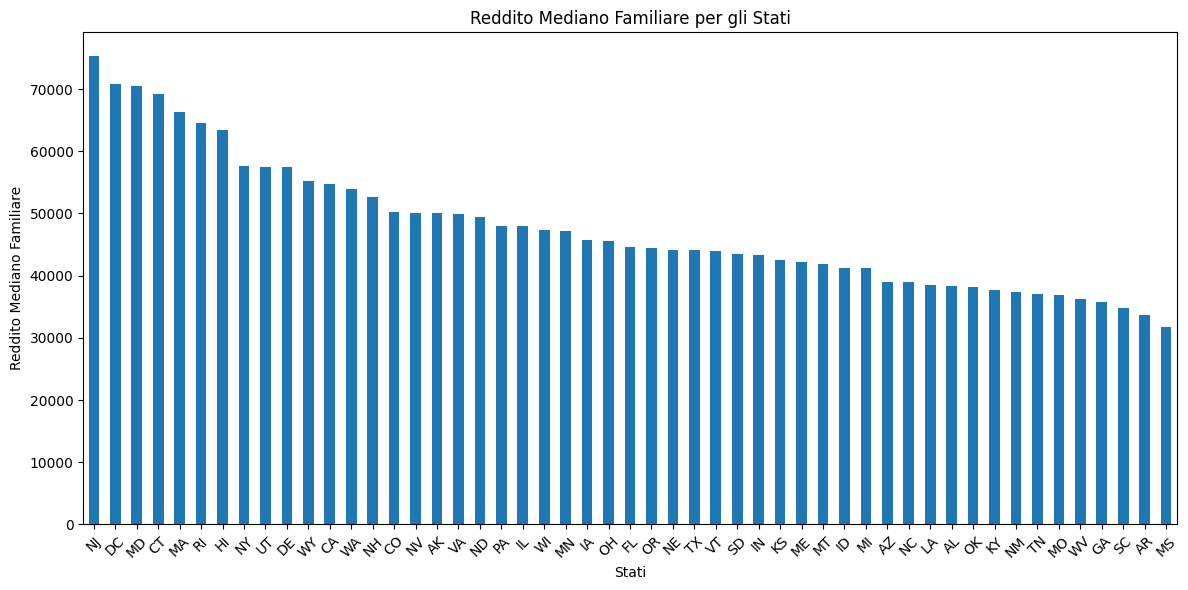

In [ ]:
# Carica il dataset Median_income_data
median_house_income_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\dataset sparatorie\MedianHouseholdIncome2015.csv'
Median_income_data = pd.read_csv(median_house_income_path, encoding='ISO-8859-1')

# Filtra solo i valori validi (interi o float) nella colonna 'Median Income'
valid_values = pd.to_numeric(Median_income_data['Median Income'], errors='coerce')
Median_income_data = Median_income_data[valid_values.notnull()]

# Converti la colonna 'Median Income' in numeri float
Median_income_data['Median Income'] = Median_income_data['Median Income'].astype(float)

# Raggruppa i dati per stato e calcola la mediana del reddito familiare
median_income_by_state = Median_income_data.groupby('Geographic Area')['Median Income'].median()

# Ordina gli stati in base alla mediana del reddito in ordine decrescente
sorted_states = median_income_by_state.sort_values(ascending=False)

# Crea un grafico a barre del reddito mediano delle famiglie per gli stati
plt.figure(figsize=(12, 6))
sorted_states.plot(kind='bar')
plt.xlabel('Stati')
plt.ylabel('Reddito Mediano Familiare')
plt.title('Reddito Mediano Familiare per gli Stati')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra il grafico
plt.show()






Guardiamo nello specifico lo stato del nostro campione (CA)

In [32]:
# Filtro i dati per lo stato della California
california_income = Median_income_data[Median_income_data['Geographic Area'] == 'CA']
california_poverty = poverty_data[poverty_data['Geographic Area'] == 'CA']

# Ordino le città in modo alfabetico e filtra quelle che iniziano con 'L' o successive
sorted_cities = sorted(california_income['city'].unique())
filtered_cities = [city for city in sorted_cities if city >= 'Los Angeles city']

# Estraggo i valori della soglia di povertà e del reddito familiare per le città selezionate
for city in filtered_cities:
    city_income = california_income[california_income['city'] == city]['Median Income'].values[0]
    city_poverty = california_poverty[california_poverty['city'] == city]['poverty_rate'].values[0]
    
    print(f'Città: {city}')
    print(f'Soglia di Povertà: {city_poverty}')
    print(f'Reddito Familiare: {city_income}')
    print('------------------------')



Città: Los Angeles city
Soglia di Povertà: 22.1
Reddito Familiare: 50205
------------------------
Città: Los Banos city
Soglia di Povertà: 26.2
Reddito Familiare: 44292
------------------------
Città: Los Berros CDP
Soglia di Povertà: 20
Reddito Familiare: 60565
------------------------
Città: Los Gatos town
Soglia di Povertà: 5.6
Reddito Familiare: 126122
------------------------
Città: Los Molinos CDP
Soglia di Povertà: 29.2
Reddito Familiare: 40347
------------------------
Città: Los Olivos CDP
Soglia di Povertà: 1.3
Reddito Familiare: 89605
------------------------
Città: Los Osos CDP
Soglia di Povertà: 9.5
Reddito Familiare: 62857
------------------------
Città: Los Ranchos CDP
Soglia di Povertà: 6
Reddito Familiare: 92500
------------------------
Città: Lost Hills CDP
Soglia di Povertà: 37.2
Reddito Familiare: 31033
------------------------
Città: Lower Lake CDP
Soglia di Povertà: 14.8
Reddito Familiare: 30610
------------------------
Città: Loyalton city
Soglia di Povertà: 16.3


Los Angeles

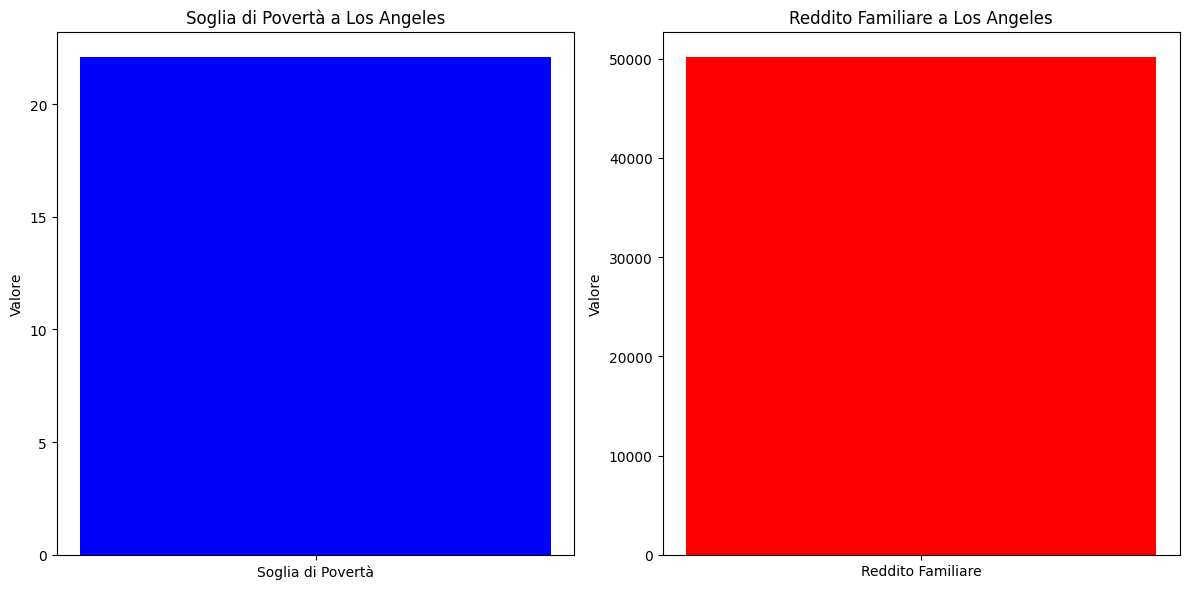

In [29]:
# Filtro i dati per lo stato della California e la città di Los Angeles
california_income = Median_income_data[(Median_income_data['Geographic Area'] == 'CA') & (Median_income_data['city'] == 'Los Angeles city')]
california_poverty = poverty_data[(poverty_data['Geographic Area'] == 'CA') & (poverty_data['city'] == 'Los Angeles city')]

# Estraggo i valori della soglia di povertà e del reddito familiare per Los Angeles
city_income = float(california_income['Median Income'].str.replace(',', '').iloc[0])
city_poverty = float(california_poverty['poverty_rate'].str.replace('%', '').iloc[0])

# Creo dei grafici
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per la soglia di povertà
axs[0].bar('Soglia di Povertà', city_poverty, color='blue')
axs[0].set_ylabel('Valore')
axs[0].set_title('Soglia di Povertà a Los Angeles')


# Grafico per il reddito familiare
axs[1].bar('Reddito Familiare', city_income, color='red')
axs[1].set_ylabel('Valore')
axs[1].set_title('Reddito Familiare a Los Angeles')

plt.tight_layout()
plt.show()


L'analisi compiuta sul nostro campione sembra rivelare che non ci sia una correlazione troppo evidente tra soglia di povertà e numero di sparatorie, in più dai dati a nostra disposizione non sembrano esserci valori significativi che ci permettono di dire se esistono bais raziali o meno. D'altra parte i dati hanno mostrato una forte disuguaglianza economica nella città, da una parte  una percentuale significativa di residenti si trova al di sotto della soglia di povertà ma d'altra il reddito familiare medio offre speranza e opportunità per il miglioramento delle condizioni di vita. 


4. CONCLUSIONI

Sulla base dei risultati ottenuti e sullo studio del nostro campione non sembrano esserci dei risultati conclusivi sulla questione dei baias razziali da parte della polizia. L'obiettivo principale di questo progetto quindi è quello di offrire una visione approfondita dei dati per alimentare un dibattito informato sulla questione dei bias razziali o aprirne altri su uno degli argomenti trattati.